In [1]:
# !pip install matplotlib

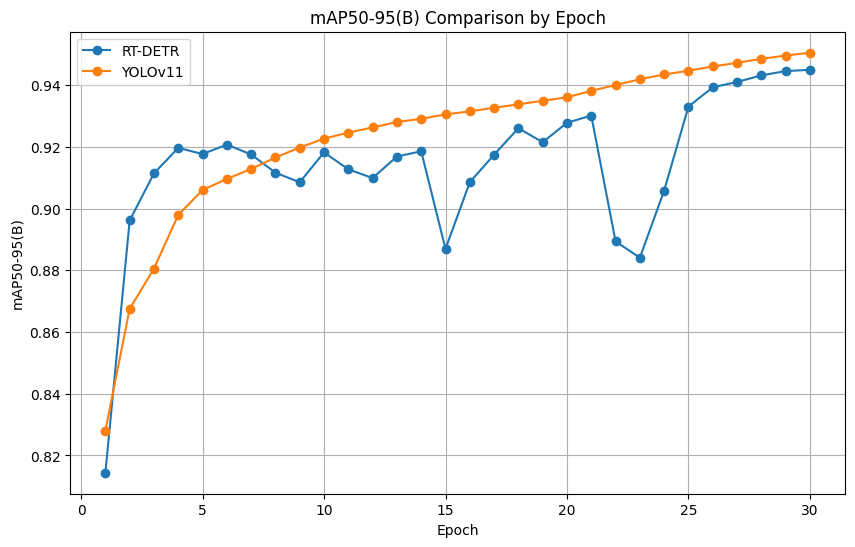

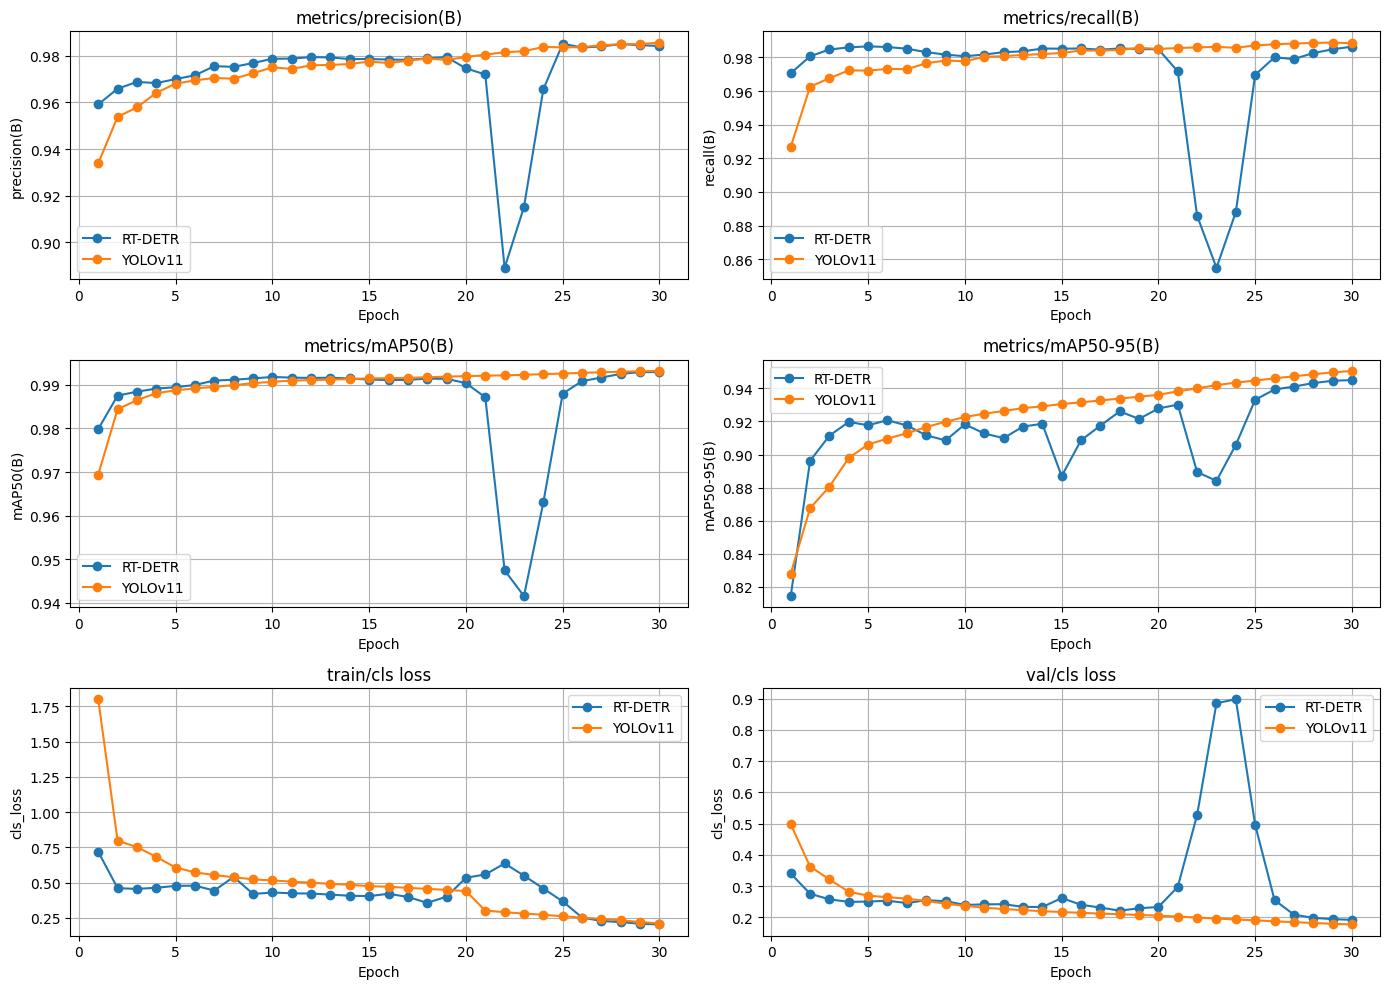

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_rtdetr = '../result/results_rtdetr_30_2.csv'
file_yolov11 = '../result/results_yolov11_30.csv'

# CSV 파일 읽기
df_rtdetr = pd.read_csv(file_rtdetr)
df_yolov11 = pd.read_csv(file_yolov11)

# mAP50-95(B) epoch 별 비교
plt.figure(figsize=(10, 6))
plt.plot(df_rtdetr['epoch'], df_rtdetr['metrics/mAP50-95(B)'], label='RT-DETR', marker='o')
plt.plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50-95(B)'], label='YOLOv11', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95(B)')
plt.title('mAP50-95(B) Comparison by Epoch')
plt.legend()
plt.grid()
plt.savefig('../result/mAP50-95_comparison.png')  # 그래프 저장
plt.show()

# Precision, Recall, mAP50, mAP50-95, train/l1_loss, val/l1_loss epoch 별 그래프
columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 
           'metrics/mAP50-95(B)', 'train/cls_loss', 'val/cls_loss']

plt.figure(figsize=(14, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df_rtdetr['epoch'], df_rtdetr[col], label='RT-DETR', marker='o')
    plt.plot(df_yolov11['epoch'], df_yolov11[col], label='YOLOv11', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(col.split('/')[-1])  # 간단한 축 라벨
    plt.title(col.replace('_', ' '))  # 제목에 언더스코어 제거
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.savefig('../result/epoch_comparison_metrics.png')  # 여러 그래프 저장
plt.show()


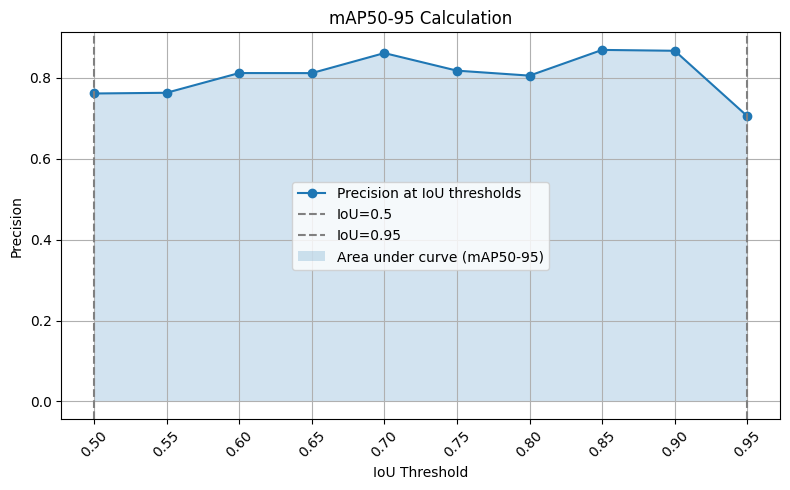

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# IoU thresholds
iou_thresholds = np.linspace(0.5, 0.95, 10)

# Example precision values (hypothetical for visualization purposes)
precision_values = np.random.uniform(0.7, 0.9, len(iou_thresholds))

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(iou_thresholds, precision_values, marker='o', label='Precision at IoU thresholds')

# Add labels, title, and grid
plt.title('mAP50-95 Calculation')
plt.xlabel('IoU Threshold')
plt.ylabel('Precision')
plt.xticks(iou_thresholds, [f"{t:.2f}" for t in iou_thresholds], rotation=45)
plt.axvline(x=0.5, color='gray', linestyle='--', label='IoU=0.5')
plt.axvline(x=0.95, color='gray', linestyle='--', label='IoU=0.95')
plt.fill_between(iou_thresholds, 0, precision_values, alpha=0.2, label='Area under curve (mAP50-95)')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# 데이터 로드
file_rtdetr = '../result/results_rtdetr_30_2.csv'
file_yolov11 = '../result/results_yolov11_30.csv'
file_yolov7 = '../result/results_yolov7_30.csv'

# CSV 파일 읽기
df_rtdetr = pd.read_csv(file_rtdetr)
df_yolov11 = pd.read_csv(file_yolov11)
df_yolov7 = pd.read_csv(file_yolov7)

# 필요한 컬럼 정의
columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
columns_yolov7 = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']

# 최고값 추출 함수
def get_max_values(df, columns1, model_name):
    max_values = {}
    max_values['Model'] = model_name
    for i, col in enumerate(columns1):
        if col in df.columns:
            max_values[columns[i-1]] = df[col].max()
    return max_values

# 각 모델의 최고값 추출
max_rtdetr = get_max_values(df_rtdetr, columns, 'RT-DETR')
max_yolov11 = get_max_values(df_yolov11, columns, 'YOLOv11')
max_yolov7 = get_max_values(df_yolov7, columns_yolov7, 'YOLOv7')

# 결과 합치기
results = pd.DataFrame([max_rtdetr, max_yolov11, max_yolov7])

# 행과 열을 바꾸기 (전치)
results_transposed = results.set_index('Model').transpose()

# 결과 출력
print(results_transposed)

# 결과를 CSV로 저장
results_transposed.to_csv('../result/max_metrics_summary_transposed.csv')


Model                 RT-DETR  YOLOv11  YOLOv7
metrics/mAP50-95(B)   0.98504  0.98555  0.8458
metrics/precision(B)  0.98657  0.98881  0.7945
metrics/recall(B)     0.99293  0.99318  0.8644
metrics/mAP50(B)      0.94501  0.95056  0.6099
